<a href="https://colab.research.google.com/github/Ravinduflash/Ravinduflash.github.io/blob/Mater/Titanic%20-%20Machine%20Learning%20from%20Disaster%20Competition%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Dataset Selection:

In [2]:
# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# 2. Data Exploration and Preprocessing:

In [3]:
# Explore the dataset
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [4]:
# Handle missing values
titanic_df.drop(["Cabin"], axis=1, inplace=True)  # Dropping Cabin due to many missing values
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
titanic_df["Embarked"].fillna(titanic_df["Embarked"].mode()[0], inplace=True)


In [5]:
# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=["Sex", "Embarked"])

# Scale numerical features (optional, depending on the model chosen)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
titanic_df[["Age", "Fare"]] = scaler.fit_transform(titanic_df[["Age", "Fare"]])

# Display the preprocessed dataset
print(titanic_df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name       Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris -0.565736      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  0.663861      1      0   
2                             Heikkinen, Miss. Laina -0.258337      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  0.433312      1      0   
4                           Allen, Mr. William Henry  0.433312      0      0   

             Ticket      Fare  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         A/5 21171 -0.502445           0         1           0           0   
1          PC 17599  0.786845           1         0           1           0   
2  STON/O2. 3101282 -0.488854           1         0           0  

# 3. Exploratory Data Analysis (EDA):

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


### Survival Distribution:

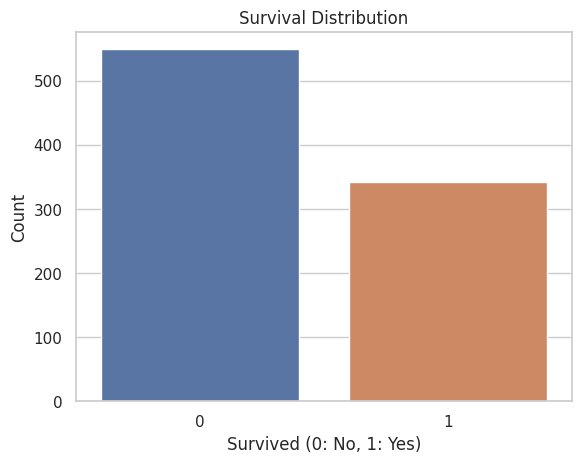

In [7]:
sns.set(style="whitegrid")

# Bar plot for survival distribution
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()




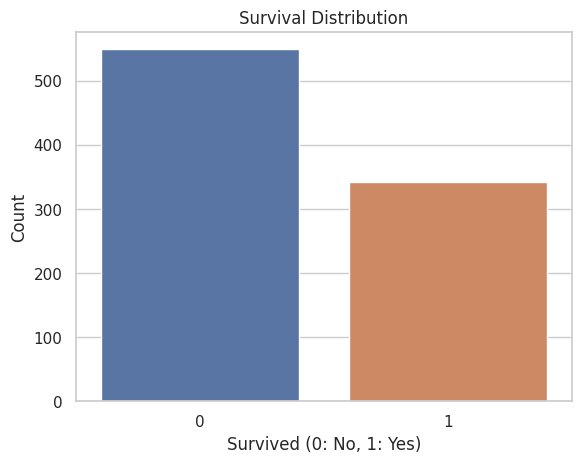

In [8]:
sns.set(style="whitegrid")

# Bar plot for survival distribution
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Distribution')
plt.xlabel('Survived (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()




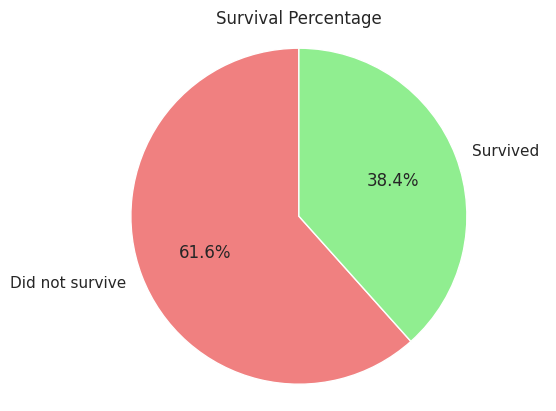

In [9]:
# Pie chart for survival distribution
labels = 'Did not survive', 'Survived'
sizes = titanic_df['Survived'].value_counts()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.title('Survival Percentage')
plt.show()

### Age Distribution:

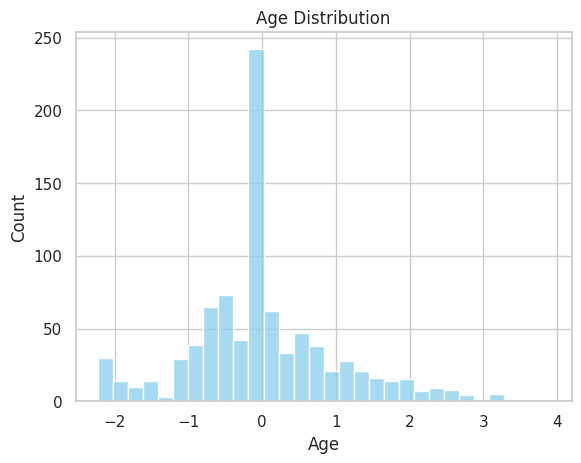

In [10]:
# Histogram of Age distribution
sns.histplot(titanic_df['Age'].dropna(), bins=30, kde=False, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


### Class Distribution:

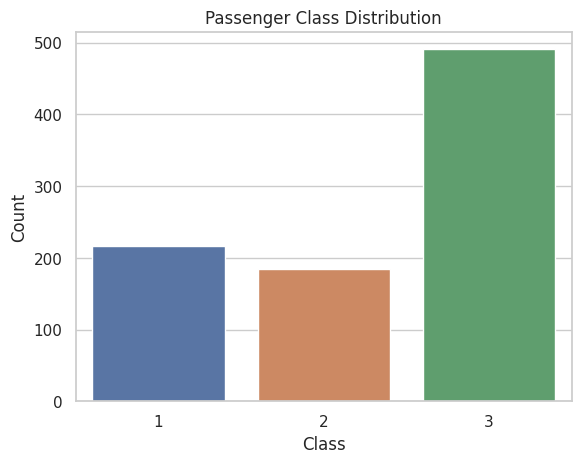

In [11]:
# Bar plot for passenger class distribution
sns.countplot(x='Pclass', data=titanic_df)
plt.title('Passenger Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


### Gender Distribution:

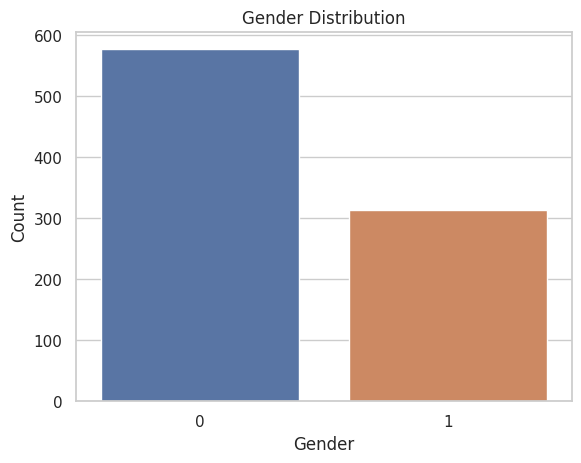

In [12]:
# Bar plot for gender distribution
sns.countplot(x='Sex_female', data=titanic_df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()



<ipython-input-13-56b0903804e3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = titanic_df.corr()


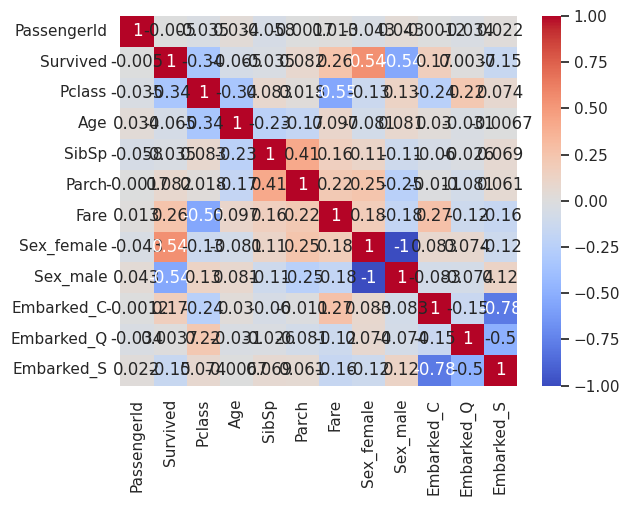

In [13]:
# Identify potential correlations
correlation_matrix = titanic_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

# 4. Model Selection:

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Split the dataset into features (X) and target variable (y)
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choose machine learning algorithms
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression(random_state=42)

# Model justification can be included here based on the dataset characteristics



# 5. Model Training and Evaluation:

In [15]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

print(X_train.columns)


Index(['PassengerId', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q',
       'Embarked_S'],
      dtype='object')


In [16]:
categorical_columns = ['Pclass', 'Sex_0.0', 'Sex_1.0', 'Embarked_0.0', 'Embarked_1.0', 'Embarked_2.0', 'Embarked_nan']


In [17]:
# Assume 'Name' and other non-numeric columns are categorical
categorical_columns = ['Name', 'Ticket']

# Define the preprocessing pipeline
numeric_features = list(X.select_dtypes(include=['int64', 'float64']).columns)
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])



### Random Forest

In [18]:
# Update X_train and X_test using the preprocessing pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Now, you can train your RandomForestClassifier
random_forest.fit(X_train_preprocessed, y_train)
rf_predictions = random_forest.predict(X_test_preprocessed)

# Continue with evaluating the model as before
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.7374


### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

# Create a Logistic Regression model
logistic_regression = LogisticRegression(random_state=42)

# Train the Logistic Regression model on the preprocessed training set
logistic_regression.fit(X_train_preprocessed, y_train)

# Make predictions on the preprocessed test set
logreg_predictions = logistic_regression.predict(X_test_preprocessed)

# Evaluate the performance of the Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.4f}")


Logistic Regression Accuracy: 0.7765


# 6. Hyperparameter Tuning:

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


In [21]:
# Assume 'Name' and other non-numeric columns are categorical
categorical_columns = ['Name', 'Ticket']

# Define the preprocessing pipeline
numeric_features = list(X.select_dtypes(include=['int64', 'float64']).columns)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_columns)
    ])

### Random Forest model with hyperparameter tuning 1

In [22]:
# Update X_train and X_test using the preprocessing pipeline
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# Random Forest model with hyperparameter tuning
param_grid_rf = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'n_estimators': [50, 100, 200]})

In [23]:
# Evaluate the tuned Random Forest model
tuned_rf_predictions = grid_search_rf.predict(X_test_preprocessed)
tuned_rf_accuracy = accuracy_score(y_test, tuned_rf_predictions)
print("Tuned Random Forest Metrics:")
print(f"Accuracy: {tuned_rf_accuracy:.4f}")
print(f"Best Parameters: {grid_search_rf.best_params_}")


Tuned Random Forest Metrics:
Accuracy: 0.7430
Best Parameters: {'max_depth': None, 'n_estimators': 200}


# Logistic Regression model with hyperparameter tuning 1

In [24]:
# Logistic Regression model with hyperparameter tuning
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"]
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_preprocessed, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']})

### Random Forest model with hyperparameter tuning 2

In [26]:
# Random Forest model with hyperparameter tuning (updated parameters)
param_grid_rf = {
    "n_estimators": [50, 100, 150],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": [1, 2, 3, 4, 5, "sqrt", "log2", None]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5)
grid_search_rf.fit(X_train_preprocessed, y_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10],
                         'max_features': [1, 2, 3, 4, 5, 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [28]:
# Evaluate the tuned Random Forest model
tuned_rf_predictions = grid_search_rf.predict(X_test_preprocessed)
tuned_rf_accuracy = accuracy_score(y_test, tuned_rf_predictions)

print("Tuned Random Forest Metrics:")
print(f"Accuracy: {tuned_rf_accuracy:.4f}")
print(f"Best Parameters: {grid_search_rf.best_params_}")

Tuned Random Forest Metrics:
Accuracy: 0.7263
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}


###  Logistic Regression model with hyperparameter tuning 2

In [27]:
# Logistic Regression model with hyperparameter tuning (updated parameters)
param_grid_lr = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100],
    "penalty": ["l1", "l2"],
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]
}

grid_search_lr = GridSearchCV(LogisticRegression(random_state=42), param_grid_lr, cv=5)
grid_search_lr.fit(X_train_preprocessed, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']})

In [29]:
# Evaluate the tuned Logistic Regression model
tuned_lr_predictions = grid_search_lr.predict(X_test_preprocessed)
tuned_lr_accuracy = accuracy_score(y_test, tuned_lr_predictions)

print("\nTuned Logistic Regression Metrics:")
print(f"Accuracy: {tuned_lr_accuracy:.4f}")
print(f"Best Parameters: {grid_search_lr.best_params_}")


Tuned Logistic Regression Metrics:
Accuracy: 0.7877
Best Parameters: {'C': 1, 'penalty': 'l2', 'solver': 'saga'}
